# 1. Load Iris Data

In [22]:
%%time

import pydotplus
from sklearn import metrics
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image , display

iris = load_iris()

x = iris.data
y = iris.target

kf = KFold(n_splits = 10)

Wall time: 4 ms


# 2.ID3 Tree

0.926666666667


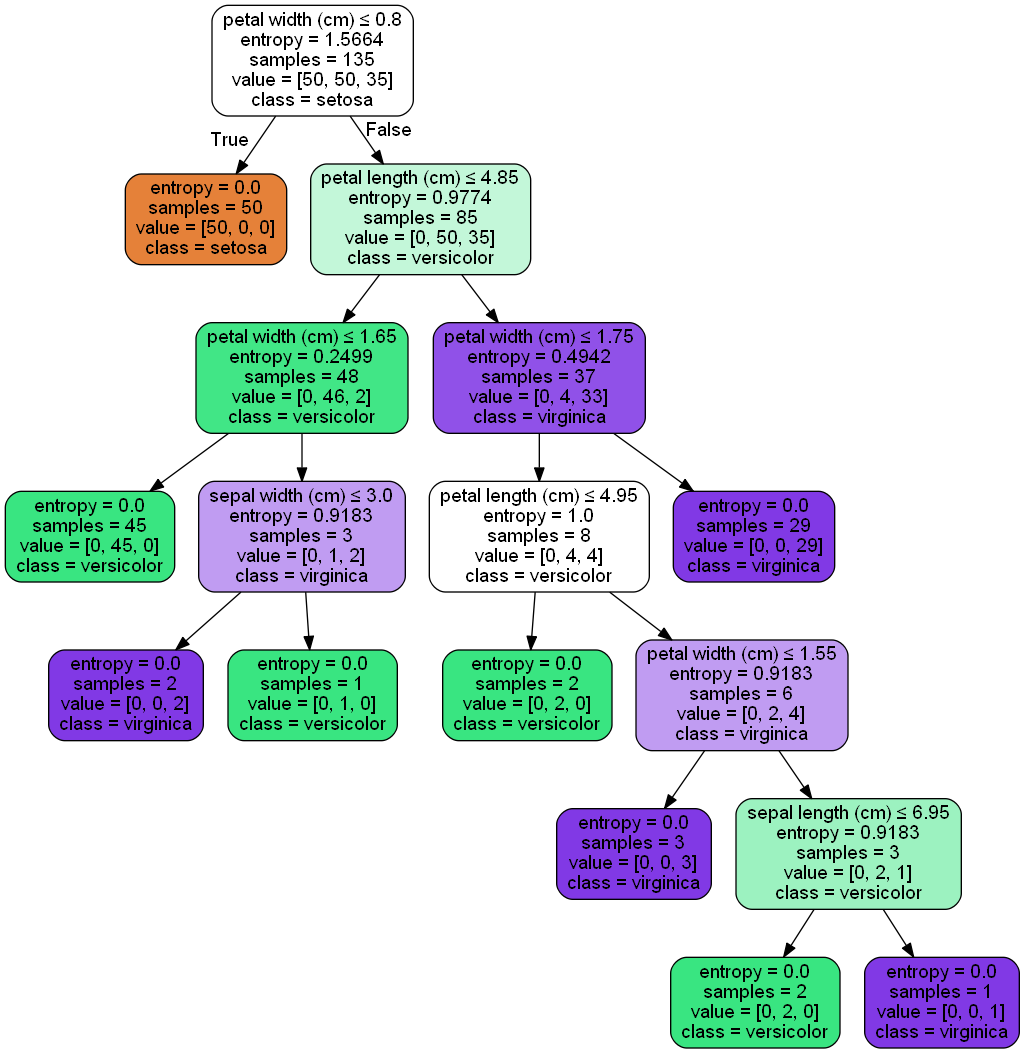

Wall time: 489 ms


In [46]:
%%time

model1 = DecisionTreeClassifier(criterion="entropy" ,max_depth = 7) # 来回浮动

total_score = []
# 10 folds
for train_index ,test_index in kf.split(x):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test  = x[test_index]
    y_test  = y[test_index]
    
    #print ("train: {0}  test:{1}".format(train_index,test_index))
    
    #train the model
    model1.fit(x_train, y_train)
    
    # test model
    y_predict1 = model1.predict(x_test)

    total_score.append(metrics.accuracy_score(y_predict1,y_test))

# 平均分
print (np.mean(total_score))

# visualise
dot_data1 = export_graphviz(model1, out_file=None, 
                            feature_names=iris.feature_names,
                            class_names=iris.target_names,   
                            filled=True, 
                            rounded=True,  
                            special_characters=True)

graph1 = pydotplus.graph_from_dot_data(dot_data1)
display(Image(graph1.create_png()))

# 3.CART Tree

1.0


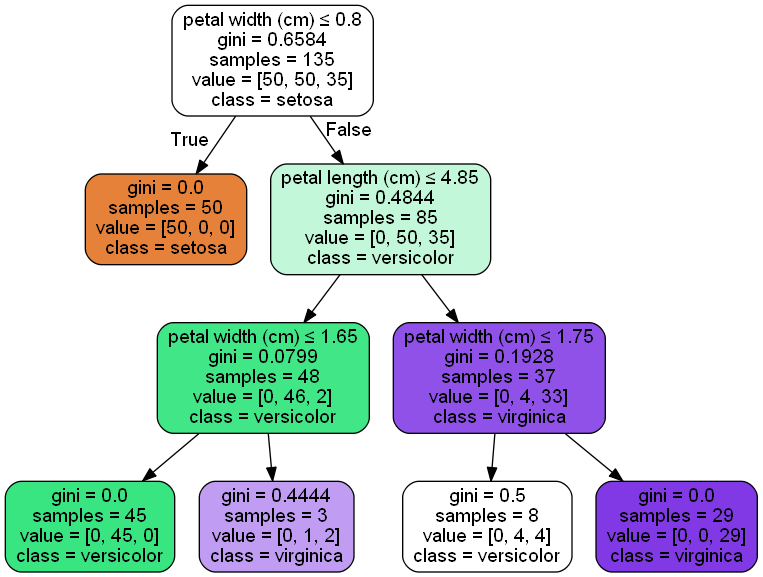

Wall time: 295 ms


In [44]:
%%time

#train
model2 = DecisionTreeClassifier(criterion="gini",max_depth = 3)

total_score = []
# 10 folds
for train_index ,test_index in kf.split(x):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test  = x[test_index]
    y_test  = y[test_index]
    
    #print ("train: {0}  test:{1}".format(train_index,test_index))
    
    #train the model
    model2.fit(x_train, y_train)
    
    # test model
    y_predict2 = model1.predict(x_test)

    total_score.append(metrics.accuracy_score(y_predict2,y_test))

# 平均分
print (np.mean(total_score))

# visualise
dot_data2 = export_graphviz(model2, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data2)
display(Image(graph2.create_png()))